In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, LinearConstraint
from tqdm import tqdm
import torch
import torch.nn as nn
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from src.cstr import *
from src.machinelearning import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
df = generate_training_data(samples=10000)
X = df[['w1', 'Cb']].values
y = df['Cb_next'].values

100%|██████████| 10000/10000 [00:00<00:00, 60003.66it/s]


In [10]:
model = SVR(kernel='rbf', C=10).fit(X, y)

In [11]:
# model = NeuralNet(2,1).to(device)
# model = train_nn(model, X, y, 5000)

In [12]:
Cb_ref = np.array([20.9 if t < 20 else 21.0 if t < 40 else 20.5 for t in range(L)])


In [13]:
Cb_res, w1_res = simulation(model, Cb_ref)

100%|██████████| 60/60 [00:07<00:00,  8.38it/s]


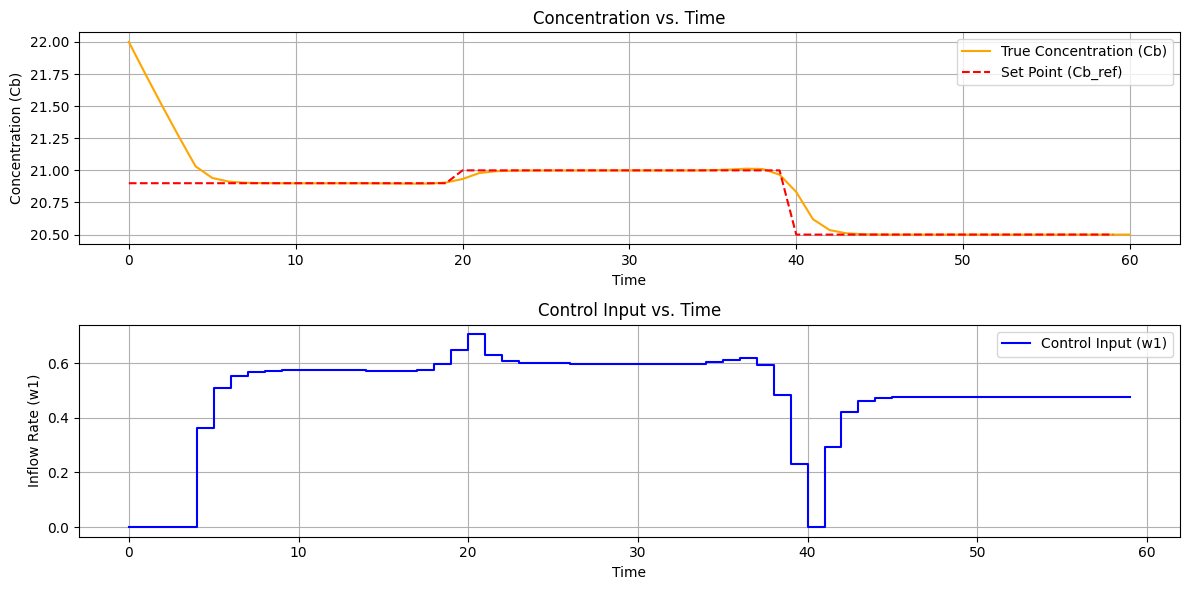

In [15]:
plot_results(Cb_res, Cb_ref, w1_res)